# Analyze Traffic Safety Data with Python

### Try some of these resources for extra help as you work:

* [View the Analyze Traffic Safety Data with Python cheatsheet](https://www.codecademy.com/learn/case-study-analyze-traffic-safety/modules/traffic-safety-case-study/cheatsheet)
* [View the solution notebook](./solution.html)
* [Learn more about analyzing traffic safety data in this introductory article](https://www.codecademy.com/courses/case-study-analyze-traffic-safety/articles/analyze-traffic-safety-data-with-python-article)

In [24]:
import pandas as pd
import datetime as dt
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt


%matplotlib inline
# set plot theme and palette
sns.set_theme()
sns.set_palette('colorblind')

## Traffic data exploration

### 1. Inspecting the traffic safety dataset


In [25]:
# load dataset
traffic=pd.read_csv("traffic.csv")

# inspect first few rows
traffic.head()

,Date,Crashes_per_100k,Season
0,2006-01-01,169.176541,Winter
1,2006-02-01,154.028836,Winter
2,2006-03-01,159.930002,Spring
3,2006-04-01,155.741270,Spring
4,2006-05-01,168.179208,Spring


### 2. Formatting the data types


In [26]:
# inspect data types
from datetime import datetime
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              180 non-null    object 
 1   Crashes_per_100k  180 non-null    float64
 2   Season            180 non-null    object 
dtypes: float64(1), object(2)
memory usage: 4.3+ KB




The traffic dataframe consists of 3 columns and 180 rows. There are no missing data. The number of crashes is normalized to the annual population per 100,000 people. We will also need to format the Date variable since Python does not yet recognize it as a datetime variable.



Convert the `Date` column to the date datatype using the `pd.to_datatime(column)` function.

In [5]:
# convert Date to date format
traffic['Date'] = pd.to_datetime(traffic['Date'])

# inspect data types
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              180 non-null    datetime64[ns]
 1   Crashes_per_100k  180 non-null    float64       
 2   Season            180 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 4.3+ KB


### 3. Visualization of traffic safety 


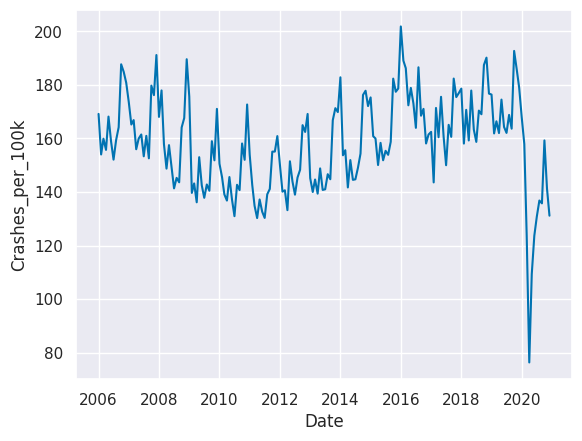

In [6]:
# create line plot
x=traffic.Date
y=traffic.Crashes_per_100k
sns.lineplot(x,y)
plt.show()

We can see the decreasing trend in crash rates from 2006 continuing until 2010 or 2011, and then crash rates begin increasing. The data for 2020 is very different from the preceding years.
    
There also appears to be cyclical patterns, which may indicate differing crash rates by season.


### 4. Visualization of seasonal rates



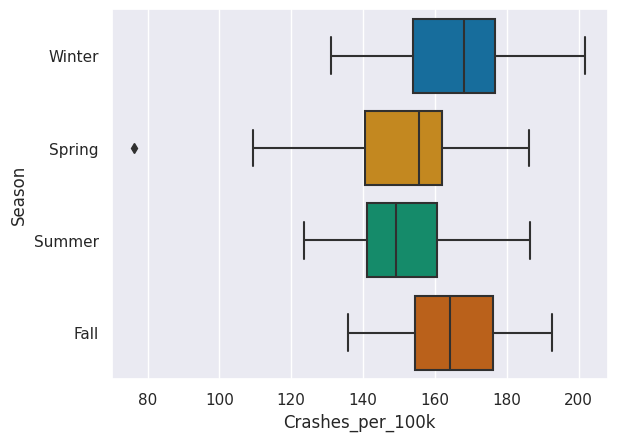

In [7]:
# create box plot by season
x=traffic.Crashes_per_100k
y=traffic.Season
sns.boxplot(x,y,data=traffic[traffic.Date.dt.year!=2020])
plt.show()


Winter and Fall appear to have generally higher crash rates than Spring and Summer. Seasons may be the reason for the pattern in crash rates.


## Smartphone data exploration

### 5. Inspection of the smartphone use dataset


In [8]:
# import dataset
smartphones = pd.read_csv("crashes_smartphones.csv")

# inspect first few rows
smartphones.head()

,Month_Year,Crashes_per_100k,Season,Smartphone_Survey_Date,Smartphone_usage
0,Apr-12,133.213685,Spring,4/3/12,46
1,Apr-15,150.077792,Spring,4/12/15,67
2,Apr-16,172.401948,Spring,4/4/16,72
3,Aug-12,145.403147,Summer,8/5/12,44
4,Dec-12,169.160811,Winter,12/9/12,45


### 6. Format date data type


In [9]:
smartphones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Month_Year              28 non-null     object 
 1   Crashes_per_100k        28 non-null     float64
 2   Season                  28 non-null     object 
 3   Smartphone_Survey_Date  28 non-null     object 
 4   Smartphone_usage        28 non-null     int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 1.2+ KB


In [10]:
# change to datetime object
smartphones['Smartphone_Survey_Date']=pd.to_datetime(smartphones['Smartphone_Survey_Date'])

# inspect data types
smartphones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Month_Year              28 non-null     object        
 1   Crashes_per_100k        28 non-null     float64       
 2   Season                  28 non-null     object        
 3   Smartphone_Survey_Date  28 non-null     datetime64[ns]
 4   Smartphone_usage        28 non-null     int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 1.2+ KB


 The smartphones dataframe consists of 5 columns and 28 rows.

### 7. Visualization of smartphone use data


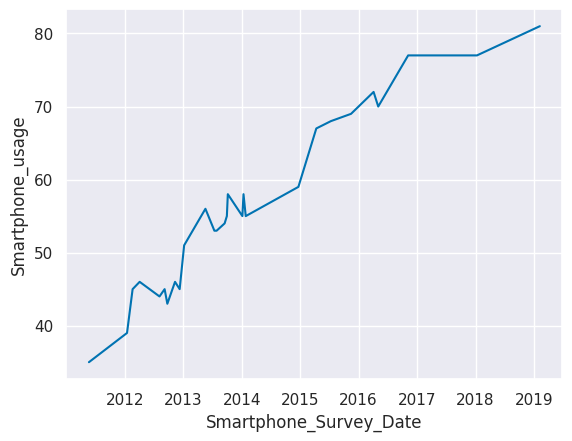

In [11]:
# create line plot
x= smartphones.Smartphone_Survey_Date
y= smartphones.Smartphone_usage
sns.lineplot(x,y)
plt.show()


We can see a trend of smartphone usage increasing over time.


## Relationship exploration

### 8. Visualize crash rate by smartphone use
A scatter plot with smartphone usage on one axis and crash rates on the other axis will give us an idea of whether there is a relationship between these two variables. 


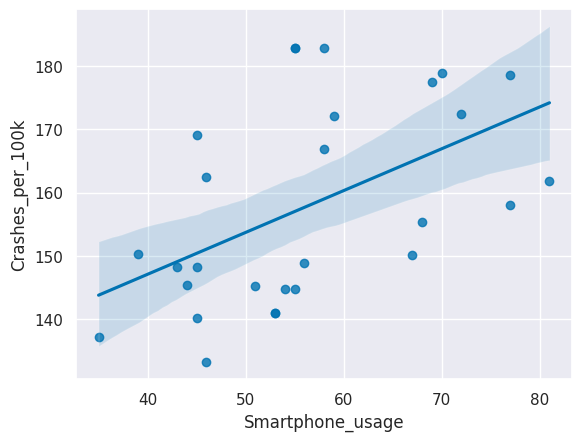

In [12]:
# create scatter plot with regression line
x= smartphones.Smartphone_usage
y= smartphones.Crashes_per_100k
sns.regplot(x,y)
plt.show()



There appears to be a positive linear relationship between the rate of car crashes and the rate of adult smartphone usage in the U.S.


### 9. Correlation coefficient

We will calculate the Pearson's _r_ correlation coefficient and the associated _p_-value. 


In [13]:
# find Pearson's r and p-value
corr, p = pearsonr(smartphones.Smartphone_usage,smartphones.Crashes_per_100k)

# print corr and p
print("Pearson's r =",  round(corr,3))
print("p = ", round(p,3))

Pearson's r = 0.513
p =  0.005




The Pearson's r correlation coefficient is greater than 0.5, which indicates a moderately strong positive relationship. The p-value is less than 0.05. Together, this tells us that there is a statistically significant correlation between adult smartphone usage rates and car crash rates in the U.S. Correlation does not mean causation.As the saying goes, many other factors may be contributing to the rise in car crash rates from 2011 to 2019. 


## Analysis

### 10. Run a linear regression
We can use a linear regression to predict crash rates based on smart phone usage. Let's regress crash rates on smartphone usage.

In [14]:
# convert columns to arrays
X = smartphones['Smartphone_usage'].to_numpy().reshape(-1, 1)
y = smartphones['Crashes_per_100k'].to_numpy().reshape(-1, 1)

In [15]:
# initiate the linear regression model
lm = LinearRegression()

# fit the model
lm.fit(X,y)

LinearRegression()

### 11. Regression coefficients


In [16]:
# print the coefficients 
print("Coefficients: \n",lm.intercept_, lm.coef_)

Coefficients: 
 [120.6637106] [[0.66103316]]


In this step, we learned the two coefficients of our linear model, `b = 120.6637` and `m = 0.6610`. So the equation for our linear model is `y = 120.6637 + (0.6610 * x)` and we can use this equation to predict new values of y from any new value of x.
    
We can also interpret the slope of 0.6610: every additional percentage point of smartphone usage is associated with an additional 0.6610 crashes per 100,000 people.


### 12. Prediction

Assuming that the smartphone usage was the same for 2020 as it was for 2019, we will predict the crash rate in 2020 based on the smartphone usage rate for 2019. Then substitute this value into the equation, using Python as a calculator to predict the crash rate for 2020.

In [17]:
# get the smartphone usage rate from 2019
smartphones[smartphones['Month_Year'] == "Feb-19"].Smartphone_usage

7    81
Name: Smartphone_usage, dtype: int64

In [18]:
# predict the crash rate in 2020 using the regression equation
120.67+(0.67*81)

174.94



If the smartphone usage rate was the same in 2020 as in 2019 (81%), our model predicts that the crash rate in 2020 would be 174.205 crashes per 100,000 people.  


### 13. Comparison to the actual rate


In [19]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              180 non-null    datetime64[ns]
 1   Crashes_per_100k  180 non-null    float64       
 2   Season            180 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 4.3+ KB


In [21]:
# get the actual crash rate in Feb 2020
traffic[traffic['Date'] == "2020-02-01"].Crashes_per_100k

169    157.88955
Name: Crashes_per_100k, dtype: float64



The actual crash rate in Februrary of 2020 was only 157.8895, which was a fair bit lower than our prediction. 

### 14. Visualization of the prediction


* The predicted 2020 crash rate
* The actual 2020 crash rate



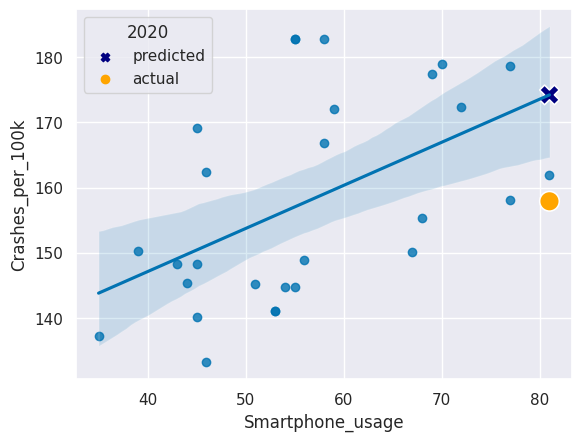

In [22]:
# recreate the regression plot we made earlier
sns.regplot(x = 'Smartphone_usage', y = 'Crashes_per_100k', data = smartphones)



# add a scatter plot layer to show the actual and predicted 2020 values
sns.scatterplot(x = [81,81], y = [174.205,157.890], 
                hue = ['predicted','actual'], style= ['predicted','actual'], 
                markers = ['X','o'], palette=['navy','orange'], s=200)

# add legend title
plt.legend(title='2020')
plt.show()
plt.show()


By adding another layer to our regression plot, we can see the difference between the predicted and real crash rates in February 2020. This allows us to see how these values compare to the rest of the dataset. 
